In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind


In [2]:
insurance=pd.read_csv("D:\Bootcamp Task\insurance.csv")

In [7]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Analisa Descriptive Statistic
### 1. Rata-rata umur pengguna?

In [5]:
print('Rata-rata umur pengguna asuransi adalah', round(insurance['age'].mean(),0), 'tahun')

Rata-rata umur pengguna asuransi adalah 39.0 tahun


### 2. Rata-rata nilai BMI dari pengguna yang merokok

In [14]:
smoker=insurance.loc[(insurance['smoker']=='yes')]
print('Rata-rata nilai BMI dari pengguna yang merokok adalah' ,round(smoker['bmi'].mean(),3))

Rata-rata nilai BMI dari pengguna yang merokok adalah 30.708


### 3. Berapa rata rata umur pada data tersebut?

In [15]:
print('Rata-rata umur pengguna yang merokok adalah' ,round(smoker['age'].mean(),0), 'tahun')

Rata-rata umur pengguna yang merokok adalah 39.0 tahun


### 4. Berapa rata rata nilai BMI dari yang merokok?

In [17]:
print('Rata-rata nilai BMI dari pengguna yang merokok adalah' ,round(smoker['bmi'].mean(),3))

Rata-rata nilai BMI dari pengguna yang merokok adalah 30.708


### 5. Apakah variansi dari data charges perokok dan non perokok sama?

In [24]:
nonsmoker=insurance.loc[(insurance['smoker']=='no')]

if np.var(smoker['charges']) == np.var(nonsmoker['charges']):
    print('Variasi dari data Charges perokok dan non perokok sama')
else:
    print('Variasi dari data Charges perokok dan non perokok beda')

Variasi dari data Charges perokok dan non perokok beda


### 6. Apakah rata rata umur perempuan dan laki-laki yang merokok sama?

In [25]:
msmoker=smoker.loc[(smoker['sex']=='male')]
fsmoker=smoker.loc[(smoker['sex']=='female')]

if round(msmoker['age'].mean(),0) == round(fsmoker['age'].mean(),0):
    print('Rata-rata umur perempuan dan laki-laki yang merokok sama')
else:
    print('Rata-rata umur perempuan dan laki-laki yang merokok beda')

Rata-rata umur perempuan dan laki-laki yang merokok beda


### 7. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok atau non merokok?

In [26]:
if smoker['charges'].mean() > nonsmoker['charges'].mean():
    print('Rata-rata tagihan kesehatan perokok lebih tinggi dari non perokok')
else:
    print('Rata-rata tagihan kesehatan non perokok lebih tinggi dari perokok')

Rata-rata tagihan kesehatan perokok lebih tinggi dari non perokok


### 8. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok yang BMI nya diatas 25 atau non perokok yang BMI nya diatas 25

In [28]:
if (smoker.loc[smoker['bmi']>25])['charges'].mean() > (nonsmoker.loc[nonsmoker['bmi']>25])['charges'].mean():
    print('Rata-rata tagihan kesehatan perokok yang BMI nya diatas 25 lebih tinggi dari rata-rata tagihan kesehatan non perokok yang BMI nya diatas 25')
else:
    print('Rata-rata tagihan kesehatan non perokok yang BMI nya diatas 25 lebih tinggi dari rata-rata tagihan kesehatan perokok yang BMI nya diatas 25')

Rata-rata tagihan kesehatan perokok yang BMI nya diatas 25 lebih tinggi dari rata-rata tagihan kesehatan non perokok yang BMI nya diatas 25


### 9. BMI mana yang lebih tinggi, seseorang laki-laki atau perempuan?

In [30]:
if insurance[insurance['sex']=='male']['bmi'].mean() > insurance[insurance['sex']=='female']['bmi'].mean():
    print('Rata-rata BMI laki-laki lebih tinggi dari BMI perempuan')
else:
    print('Rata-rata BMI perempuan lebih tinggi dari BMI laki-laki')

Rata-rata BMI laki-laki lebih tinggi dari BMI perempuan


### 10. BMI mana yang lebih tinggi, seseorang perokok atau non perokok?

In [31]:
if smoker['bmi'].mean() > nonsmoker['bmi'].mean():
    print('Rata-rata BMI perokok lebih tinggi dari BMI non perokok')
else:
    print('Rata-rata BMI non perokok lebih tinggi dari BMI perokok')

Rata-rata BMI perokok lebih tinggi dari BMI non perokok


# Analisa Variabel Kategorik (PMF)
### 1. Gender mana yang memiliki tagihan paling tinggi?


In [32]:
if insurance[insurance['sex']=='male']['charges'].mean() > insurance[insurance['sex']=='female']['charges'].mean():
    print('Rata-rata tagihan laki-laki lebih tinggi dari tagihan perempuan')
else:
    print('Rata-rata tagihan perempuan lebih tinggi dari tagihan laki-laki')

Rata-rata tagihan laki-laki lebih tinggi dari tagihan perempuan


### 2. Distribusi peluang tagihan di tiap-tiap region

In [90]:
pcharge_northeast=np.sum(insurance[insurance['region']=='northeast']['charges'])/np.sum(insurance['charges'])*100
pcharge_northwest=np.sum(insurance[insurance['region']=='northwest']['charges'])/np.sum(insurance['charges'])*100
pcharge_southeast=np.sum(insurance[insurance['region']=='southeast']['charges'])/np.sum(insurance['charges'])*100
pcharge_southwest=np.sum(insurance[insurance['region']=='southwest']['charges'])/np.sum(insurance['charges'])*100

print('Distribusi peluang northeast adalah' ,round(pcharge_northeast,2),'%')
print('Distribusi peluang northwest adalah' ,round(pcharge_northwest,2),'%')
print('Distribusi peluang southeast adalah' ,round(pcharge_southeast,2),'%')
print('Distribusi peluang southwest adalah' ,round(pcharge_southwest,2),'%')

Distribusi peluang northeast adalah 24.46 %
Distribusi peluang northwest adalah 22.73 %
Distribusi peluang southeast adalah 30.21 %
Distribusi peluang southwest adalah 22.6 %


### 3. Apakah setiap region memiliki proporsi data banyak orang yang sama?

In [64]:
j_northeast=round((insurance[insurance['region']=='northeast']['region']).count()/(insurance['region']).count()*100,2)
j_northwest=round((insurance[insurance['region']=='northwest']['region']).count()/(insurance['region']).count()*100,2)
j_southeast=round((insurance[insurance['region']=='southeast']['region']).count()/(insurance['region']).count()*100,2)
j_southwest=round((insurance[insurance['region']=='southwest']['region']).count()/(insurance['region']).count()*100,2)

print('Proporsi banyaknya orang untuk region northeast sebanyak ' , j_northeast,'%')
print('Proporsi banyaknya orang untuk region northwest sebanyak ' , j_northwest,'%')
print('Proporsi banyaknya orang untuk region southeast sebanyak ' , j_southeast,'%')
print('Proporsi banyaknya orang untuk region southwest sebanyak ' , j_southwest,'%')

if j_northeast==j_northwest==j_southeast==j_southwest:
    print('Sehingga proporsi banyaknya orang setiap region sama')
else:
    print('Sehingga proporsi banyaknya orang setiap region beda')

Proporsi banyaknya orang untuk region northeast sebanyak  24.22 %
Proporsi banyaknya orang untuk region northwest sebanyak  24.29 %
Proporsi banyaknya orang untuk region southeast sebanyak  27.2 %
Proporsi banyaknya orang untuk region southwest sebanyak  24.29 %
Sehingga proporsi banyaknya orang setiap region beda


### 4. Mana yang lebih tinggi proporsi perokok atau non perokok?

In [68]:
if round((insurance[insurance['smoker']=='yes']['smoker']).count()/(insurance['smoker']).count()*100,2) > round((insurance[insurance['smoker']=='no']['smoker']).count()/(insurance['smoker']).count()*100,2):
    print('Proporsi perokok lebih tinggi dari non perokok')
else:
    print('Proporsi non perokok lebih tinggi dari perokok')

Proporsi non perokok lebih tinggi dari perokok


### 5. Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?

In [87]:
print('Peluang seseorang tersebut adalah perempuan jika diketahui dia perokok adalah ',round(fsmoker['smoker'].count()/smoker['smoker'].count(),3))

Peluang seseorang tersebut adalah perempuan jika diketahui dia perokok adalah  0.42


### 6. Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?

In [88]:
print('Peluang seseorang tersebut adalah laki-laki jika diketahui dia perokok adalah ',round(msmoker['smoker'].count()/smoker['smoker'].count(),3))

Peluang seseorang tersebut adalah laki-laki jika diketahui dia perokok adalah  0.58


### 7. Bagaimana bentuk distribusi peluang besar tagihan dari tiap-tiap region?

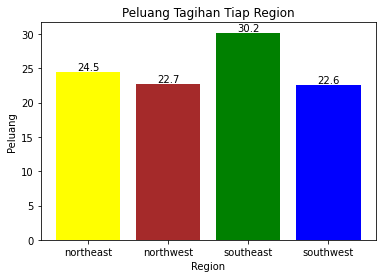

In [108]:
#Distribusi Peluang Setiap Region Memiliki Tagihan 
x = ['northeast','northwest','southeast','southwest']
y = [round(pcharge_northeast,1), round(pcharge_northwest,1), round(pcharge_southeast,1), round(pcharge_southwest,1)]
warna = ['yellow', 'brown', 'green', 'blue']
plt.bar(x,y,color=warna)
plt.xlabel('Region')
plt.ylabel('Peluang')
plt.title('Peluang Tagihan Tiap Region')
for i in range(len(x)):
    plt.text(i, y[i], y[i], ha='center', va='bottom')
plt.show()

# Analisa Variabel Kontinu
### 1. Mana yang lebih mungkin terjadi
- a. Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k, atau
- b. Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k


In [124]:
nomor1a=insurance.loc[(insurance['bmi']>25) & (insurance['charges']>16700)]['age'].count()/(insurance['age']).count()
nomor1b=insurance.loc[(insurance['bmi']<25) & (insurance['charges']>16700)]['age'].count()/(insurance['age']).count()

if nomor1a > nomor1b:
    print('Sehingga peluang seseorang dengan BMI diatas 25 dan tagihan kesehatan diatas 16.7K lebih besar dari peluang seseorang dengan BMI dibawah 25 dan tagihan kesehatan diatas 16.7K')
else:
    print('Sehingga peluang seseorang dengan BMI dibawah 25 dan tagihan kesehatan diatas 16.7K lebih besar dari peluang seseorang dengan BMI diatas 25 dan tagihan kesehatan diatas 16.7K')

Sehingga peluang seseorang dengan BMI diatas 25 dan tagihan kesehatan diatas 16.7K lebih besar dari peluang seseorang dengan BMI dibawah 25 dan tagihan kesehatan diatas 16.7K


### 2. Mana yang lebih mungkin terjadi
- a. Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k,
    atau
- b. Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k

In [125]:
nomor2a=smoker.loc[(smoker['bmi']>25) & (smoker['charges']>16700)]['age'].count()/(smoker['age']).count()
nomor2b=nonsmoker.loc[(nonsmoker['bmi']>25) & (nonsmoker['charges']>16700)]['age'].count()/(nonsmoker['age']).count()

if nomor2a > nomor2b:
    print('Sehingga peluang seseorang perokok dengan BMI diatas 25 dan tagihan kesehatan diatas 16.7K lebih besar dari peluang seseorang non perokok dengan BMI diatas 25 dan tagihan kesehatan diatas 16.7K')
else:
    print('Sehingga peluang seseorang non perokok dengan BMI diatas 25 dan tagihan kesehatan diatas 16.7K lebih besar dari peluang seseorang perokok dengan BMI diatas 25 dan tagihan kesehatan diatas 16.7K')

Sehingga peluang seseorang perokok dengan BMI diatas 25 dan tagihan kesehatan diatas 16.7K lebih besar dari peluang seseorang non perokok dengan BMI diatas 25 dan tagihan kesehatan diatas 16.7K


# Analisa Korelasi Variabel

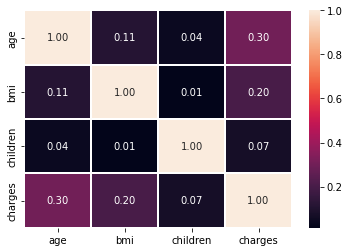

In [150]:
plt.subplots(figure)
sns.heatmap(insurance.corr(), annot = True, linewidths=1.5 , fmt = ".2f")
plt.show()

Dari nilai korelasi diatas, diambil 2 indikator yang memiliki nilai korelasi tertinggi yaitu
- age vs charge dengan nilai korelasi positif 0.3 dan
- bmi vs charge dengan nilai korelasi positif 0.2

Text(0.5, 1.0, 'Sebaran umur dan tagihan kesehatan pengguna asuransi')

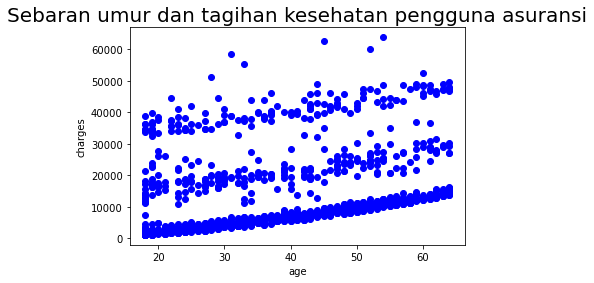

In [156]:
plt.scatter(insurance['age'], insurance['charges'], color='blue')
plt.xlabel('age')
plt.ylabel('charges')
plt.title('Sebaran umur dan tagihan kesehatan pengguna asuransi', fontsize=20)

Text(0.5, 1.0, 'Sebaran bmi dan tagihan kesehatan pengguna asuransi')

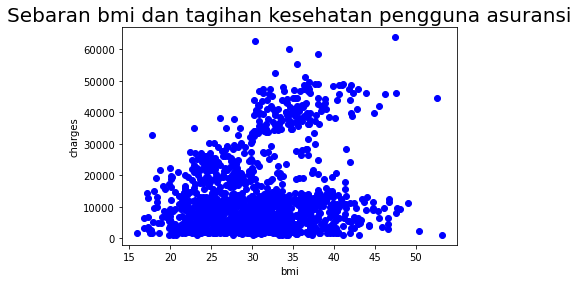

In [157]:
plt.scatter(insurance['bmi'], insurance['charges'], color='blue')
plt.xlabel('bmi')
plt.ylabel('charges')
plt.title('Sebaran bmi dan tagihan kesehatan pengguna asuransi', fontsize=20)

# Pengujian Hipotesis
Hipotesis yang dipilih adalah
1. Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok
2. Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25
3. Tagihan kesehatan laki-laki lebih besar dari perempuan

Langkah-langkah uji hipotesis:

    1. Menyatakan hipotesis null dan alternatif hipotesis
    2. Menghitung uji statistik
    3. Menentukan aturan keputusan
    4. Menyatakan rejection decision
    5. Kesimpulan

### 1. Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok
#### Hipotesis :
    𝐻0:Tagihan Kesehatan Perokok >= tagihan kesehatan non perokok
    𝐻1:Tagihan Kesehatan Perokok < tagihan kesehatan non perokok

In [183]:
Alpha = 0.05
x = np.array(smoker['charges'].sample(n=30))
y = np.array(nonsmoker['charges'].sample(n=30))

# uji t-test
stat, p  = ttest_ind(x,y, equal_var=False, alternative='less')  

print('Statistics = %.2f, p-value = %.2f' % (stat,p))

Statistics = 8.38, p-value = 1.00


In [186]:
print('Jika P-Value>Alpha(0.05) maka tidak tolak H0')
print('Nilai P-Value = ',round(p,3))
print('Sehingga')

if p > Alpha: 
    print('Tidak Tolak 𝐻0')
else:
    print('Tolak 𝐻0')

Jika P-Value>Alpha(0.05) maka tidak tolak H0
Nilai P-Value =  1.0
Sehingga
Tidak Tolak 𝐻0


##### Dengan tingkat kepercayaan 95% maka dapat dinyatakan bahwa tagihan perokok secara rata-rata lebih besar daripada tagihan non perokok.

### 2. Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25
#### Hipotesis :
    𝐻0:Tagihan Kesehatan dengan BMI diatas 25 >= tagihan kesehatan BMI dibawah 25
    𝐻1:Tagihan kesehatan dengan BMI diatas 25 < tagihan kesehatan dengan BMI dibawah 25

In [192]:
Alpha = 0.05
x = np.array(insurance[insurance['bmi'] > 25.00] ['charges'].sample(n=30))
y = np.array(insurance[insurance['bmi'] < 25.00] ['charges'].sample(n=30))

# uji t-test
stat, p  = ttest_ind(x,y, equal_var=False, alternative='less')  

print('Statistics = %.2f, p-value = %.2f' % (stat,p))

Statistics = 1.07, p-value = 0.86


In [193]:
print('Jika P-Value>Alpha(0.05) maka tidak tolak H0')
print('Nilai P-Value = ',round(p,3))
print('Sehingga')

if p > Alpha: 
    print('Tidak Tolak 𝐻0')
else:
    print('Tolak 𝐻0')

Jika P-Value>Alpha(0.05) maka tidak tolak H0
Nilai P-Value =  0.856
Sehingga
Tidak Tolak 𝐻0


##### Dengan tingkat kepercayaan 95% maka dapat dinyatakan bahwa tagihan pengguna dengan BMI diatas 25 lebih besar daripada tagihan pengguna dengan BMI dibawah 25.

### 3.Tagihan kesehatan laki-laki lebih besar dari tagihan kesehatan perempuan?
#### Hipotesis :
    𝐻0:Tagihan kesehatan laki-laki >= tagihan kesehatan perempuan
    𝐻1:Tagihan kesehatan laki-laki < tagihan kesehatan perempuan

In [195]:
Alpha = 0.05
x = np.array(insurance[insurance['sex'] == 'male'] ['charges'].sample(n=30))
y = np.array(insurance[insurance['sex'] == 'female'] ['charges'].sample(n=30))

# uji t-test
stat, p  = ttest_ind(x,y, equal_var=False, alternative='less')  

print('Statistics = %.2f, p-value = %.2f' % (stat,p))

Statistics = -1.47, p-value = 0.07


In [196]:
print('Jika P-Value>Alpha(0.05) maka tidak tolak H0')
print('Nilai P-Value = ',round(p,3))
print('Sehingga')

if p > Alpha: 
    print('Tidak Tolak 𝐻0')
else:
    print('Tolak 𝐻0')

Jika P-Value>Alpha(0.05) maka tidak tolak H0
Nilai P-Value =  0.074
Sehingga
Tidak Tolak 𝐻0


##### Dengan tingkat kepercayaan 95% maka dapat dinyatakan bahwa tagihan kesehatan laki-laki lebih tinggi dari tagihan kesehatan perempuan.